In [1]:
import CalculatedFieldSubroutines as routines
import pandas as pd
import numpy as np
import os
import plotly.express as px

### Read and preprocces data


In [2]:
gmID = '6d2ea45a-c839-11ee-a7fc-dd032dba19e8'


df_chassis = pd.read_csv(f'./data/chassis/{gmID}.csv')
df_pose = pd.read_csv(f'./data/best_pose/{gmID}.csv')

# df_chassis = pd.read_csv(f'./data/Raw_Data/{gmID}/_apollo_canbus_chassis/{gmID}_apollo_canbus_chassis.csv')
# df_pose = pd.read_csv(f'./data/Raw_Data/{gmID}/_apollo_sensor_gnss_best_pose/{gmID}_apollo_sensor_gnss_best_pose.csv')
# drive_event = pd.read_csv(f'./data/drive_event/drive_events.csv')

# df_metadata = pd.read_csv(f'./data/metadata/{gmID}.csv')
ads_index = pd.read_csv('./data/ads_data_index.csv')

In [3]:
ads_index = ads_index[ads_index['groupMetadataID'] == gmID]

# drive_event = drive_event[drive_event['groupMetadataID'] == gmID]

# drive_event.sort_values(by='time', inplace=True)
df_chassis.sort_values(by='time', inplace=True)
df_pose.sort_values(by='time', inplace=True)

# df_chassis['drivingMode'] = np.where(df_chassis['drivingMode'] == 'COMPLETE_AUTO_DRIVE', 'COMPLETE_AUTO_DRIVE','COMPLETE_MANUAL')

routines.BinaryDrivingMode(df_chassis)

In [4]:
df_chassis.head()

,yawRate,drivingMode,topic,msgsize,time,gearLocation,metadataID,throttlePercentage,steeringPercentage,brakePercentage,...,header.timestampSec,wheelSpeed.isWheelSpdRrValid,wheelSpeed.wheelSpdRr,wheelSpeed.isWheelSpdRlValid,wheelSpeed.wheelSpdFr,wheelSpeed.isWheelSpdFrValid,wheelSpeed.wheelSpdRl,wheelSpeed.wheelSpdFl,wheelSpeed.isWheelSpdFlValid,BinaryDrivingMode
18769,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470624378395,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,1.694623e+09,True,44.401196,True,44.401196,True,44.139397,44.244114,True,0
59177,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470644321111,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,1.694623e+09,True,44.401196,True,44.401196,True,44.139397,44.244114,True,0
10028,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470664462647,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,1.694623e+09,True,44.401196,True,44.401196,True,44.139397,44.244114,True,0
81770,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470684316218,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,1.694623e+09,True,44.401196,True,44.401196,True,44.296474,44.348835,True,0
37542,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470705159403,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,1.694623e+09,True,44.401196,True,44.401196,True,44.296474,44.348835,True,0


In [5]:
df_pose.head()

,time,longitudeStdDev,numSatsMulti,groupMetadataID,numSatsTracked,latitudeStdDev,differentialAge,longitude,solType,solutionAge,solStatus,latitude,numSatsInSolution
1374,1694623471040511870,0.042291,6,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,11,0.049374,2.0,-82.100829,NARROW_INT,0.0,SOL_COMPUTED,39.366212,7
1354,1694623472046692552,0.055986,8,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,10,0.075051,3.0,-82.100697,NARROW_INT,0.0,SOL_COMPUTED,39.366315,9
1432,1694623473036271165,0.064137,7,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,9,0.080693,4.0,-82.100567,NARROW_INT,0.0,SOL_COMPUTED,39.366422,7
1451,1694623474042779148,0.085414,4,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,9,0.139743,5.0,-82.100443,NARROW_INT,0.0,SOL_COMPUTED,39.366534,5
454,1694623475033571142,0.098462,7,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,9,0.151905,6.0,-82.100326,NARROW_INT,0.0,SOL_COMPUTED,39.366653,7


In [6]:
ads_index

,count,groupMetadataID,start_time,end_time,nummsgs,filebase,folder,vehilceID,experimentID
8,80,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,1.694620e+18,1.694630e+18,1816742,/Deployment_2_SEOhio/RedRoute/OU Pacifica/1694...,/Deployment_2_SEOhio/RedRoute/OU Pacifica/1694...,OUPacifica,11


In [7]:
# drive_event.head()

### Map route


In [8]:
routines.TernaryDrivingModeTransition(df_chassis)
routines.LatLonTotalStdDev(df_pose)
routines.ChassisBestPoseMatchedTime(df_chassis, df_pose)

In [9]:
df_chassis

,yawRate,drivingMode,topic,msgsize,time,gearLocation,metadataID,throttlePercentage,steeringPercentage,brakePercentage,...,wheelSpeed.wheelSpdRr,wheelSpeed.isWheelSpdRlValid,wheelSpeed.wheelSpdFr,wheelSpeed.isWheelSpdFrValid,wheelSpeed.wheelSpdRl,wheelSpeed.wheelSpdFl,wheelSpeed.isWheelSpdFlValid,BinaryDrivingMode,TernaryDrivingModeTransition,ChassisBestPoseMatchedTime
18769,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470624378395,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,44.401196,True,44.401196,True,44.139397,44.244114,True,0,0,1694623471040511870
59177,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470644321111,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,44.401196,True,44.401196,True,44.139397,44.244114,True,0,0,1694623471040511870
10028,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470664462647,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,44.401196,True,44.401196,True,44.139397,44.244114,True,0,0,1694623471040511870
81770,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470684316218,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,44.401196,True,44.401196,True,44.296474,44.348835,True,0,0,1694623471040511870
37542,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470705159403,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,44.401196,True,44.401196,True,44.296474,44.348835,True,0,0,1694623471040511870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77858,0,EMERGENCY_MODE,/apollo/canbus/chassis,134,1694625333424424763,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,5.076647,18.4,...,12.932896,True,12.880535,True,13.037615,12.880535,True,0,0,1694625333036718029
19790,0,EMERGENCY_MODE,/apollo/canbus/chassis,134,1694625333447431377,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,5.076647,18.4,...,12.932896,True,12.880535,True,13.037615,12.880535,True,0,0,1694625333036718029
17097,0,EMERGENCY_MODE,/apollo/canbus/chassis,134,1694625333464256979,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,7.892891,18.8,...,12.671096,True,12.618736,True,12.618736,12.514016,True,0,0,1694625333036718029
27684,0,EMERGENCY_MODE,/apollo/canbus/chassis,134,1694625333484287645,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,7.892891,18.8,...,12.671096,True,12.618736,True,12.618736,12.514016,True,0,0,1694625333036718029


In [10]:
merged_df = pd.merge(df_chassis, df_pose, on='ChassisBestPoseMatchedTime')
merged_df

,yawRate,drivingMode,topic,msgsize,time_x,gearLocation,metadataID,throttlePercentage,steeringPercentage,brakePercentage,...,numSatsTracked,latitudeStdDev,differentialAge,longitude,solType,solutionAge,solStatus,latitude,numSatsInSolution,LatLonTotalStdDev
0,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470624378395,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,11,0.049374,2.0,-82.100829,NARROW_INT,0.0,SOL_COMPUTED,39.366212,7,0.065010
1,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470644321111,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,11,0.049374,2.0,-82.100829,NARROW_INT,0.0,SOL_COMPUTED,39.366212,7,0.065010
2,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470664462647,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,11,0.049374,2.0,-82.100829,NARROW_INT,0.0,SOL_COMPUTED,39.366212,7,0.065010
3,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470684316218,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,11,0.049374,2.0,-82.100829,NARROW_INT,0.0,SOL_COMPUTED,39.366212,7,0.065010
4,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470705159403,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,11,0.049374,2.0,-82.100829,NARROW_INT,0.0,SOL_COMPUTED,39.366212,7,0.065010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92992,0,EMERGENCY_MODE,/apollo/canbus/chassis,134,1694625333424424763,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,5.076647,18.4,...,15,0.015428,1.0,-82.102997,NARROW_INT,0.0,SOL_COMPUTED,39.364512,14,0.020131
92993,0,EMERGENCY_MODE,/apollo/canbus/chassis,134,1694625333447431377,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,5.076647,18.4,...,15,0.015428,1.0,-82.102997,NARROW_INT,0.0,SOL_COMPUTED,39.364512,14,0.020131
92994,0,EMERGENCY_MODE,/apollo/canbus/chassis,134,1694625333464256979,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,7.892891,18.8,...,15,0.015428,1.0,-82.102997,NARROW_INT,0.0,SOL_COMPUTED,39.364512,14,0.020131
92995,0,EMERGENCY_MODE,/apollo/canbus/chassis,134,1694625333484287645,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,7.892891,18.8,...,15,0.015428,1.0,-82.102997,NARROW_INT,0.0,SOL_COMPUTED,39.364512,14,0.020131


In [11]:
merged_df['drivingMode'] = np.where(merged_df['BinaryDrivingMode'] == 0, "Manual", "Autonomous")
merged_df['TernaryDrivingModeTransition'] = merged_df['TernaryDrivingModeTransition'].astype(str)

In [15]:
merged_df

,yawRate,drivingMode,topic,msgsize,time_x,gearLocation,metadataID,throttlePercentage,steeringPercentage,brakePercentage,...,numSatsTracked,latitudeStdDev,differentialAge,longitude,solType,solutionAge,solStatus,latitude,numSatsInSolution,LatLonTotalStdDev
0,0,Manual,/apollo/canbus/chassis,133,1694623470624378395,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,11,0.049374,2.0,-82.100829,NARROW_INT,0.0,SOL_COMPUTED,39.366212,7,0.065010
1,0,Manual,/apollo/canbus/chassis,133,1694623470644321111,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,11,0.049374,2.0,-82.100829,NARROW_INT,0.0,SOL_COMPUTED,39.366212,7,0.065010
2,0,Manual,/apollo/canbus/chassis,133,1694623470664462647,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,11,0.049374,2.0,-82.100829,NARROW_INT,0.0,SOL_COMPUTED,39.366212,7,0.065010
3,0,Manual,/apollo/canbus/chassis,133,1694623470684316218,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,11,0.049374,2.0,-82.100829,NARROW_INT,0.0,SOL_COMPUTED,39.366212,7,0.065010
4,0,Manual,/apollo/canbus/chassis,133,1694623470705159403,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,11,0.049374,2.0,-82.100829,NARROW_INT,0.0,SOL_COMPUTED,39.366212,7,0.065010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92992,0,Manual,/apollo/canbus/chassis,134,1694625333424424763,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,5.076647,18.4,...,15,0.015428,1.0,-82.102997,NARROW_INT,0.0,SOL_COMPUTED,39.364512,14,0.020131
92993,0,Manual,/apollo/canbus/chassis,134,1694625333447431377,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,5.076647,18.4,...,15,0.015428,1.0,-82.102997,NARROW_INT,0.0,SOL_COMPUTED,39.364512,14,0.020131
92994,0,Manual,/apollo/canbus/chassis,134,1694625333464256979,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,7.892891,18.8,...,15,0.015428,1.0,-82.102997,NARROW_INT,0.0,SOL_COMPUTED,39.364512,14,0.020131
92995,0,Manual,/apollo/canbus/chassis,134,1694625333484287645,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,7.892891,18.8,...,15,0.015428,1.0,-82.102997,NARROW_INT,0.0,SOL_COMPUTED,39.364512,14,0.020131


### Scatterplot Matrices


In [68]:
cols = [
    "drivingMode",
    # "throttlePercentage",
    # "steeringPercentage",
    # "brakePercentage",
    # "steeringRate",
    "speedMps",
    # "signal.turnSignal",
    # "BinaryDrivingMode",
    # "TernaryDrivingModeTransition",
    # "longitudeStdDev",
    # "latitudeStdDev",
    "differentialAge",
    # "solutionAge",
    "numSatsInSolution",
    # "numSatsTracked",
    "LatLonTotalStdDev"
]

i = 92997

merged_df.iloc[:i][cols].sample(i)

,drivingMode,speedMps,differentialAge,numSatsInSolution,LatLonTotalStdDev
77831,Autonomous,13.233514,2.0,14,0.052812
81835,Manual,23.420150,1.0,12,0.016617
77137,Manual,23.639336,1.0,16,0.030874
30442,Autonomous,17.482647,269.0,8,1.749591
22238,Autonomous,17.983950,105.0,8,1.373771
...,...,...,...,...,...
19702,Manual,22.936209,54.0,7,1.951498
68176,Autonomous,23.765203,1.0,15,0.014871
13383,Autonomous,17.545582,78.0,9,1.212354
10410,Autonomous,17.358950,18.0,6,2.849973


c:\Users\Vince\miniconda3\envs\TDM\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


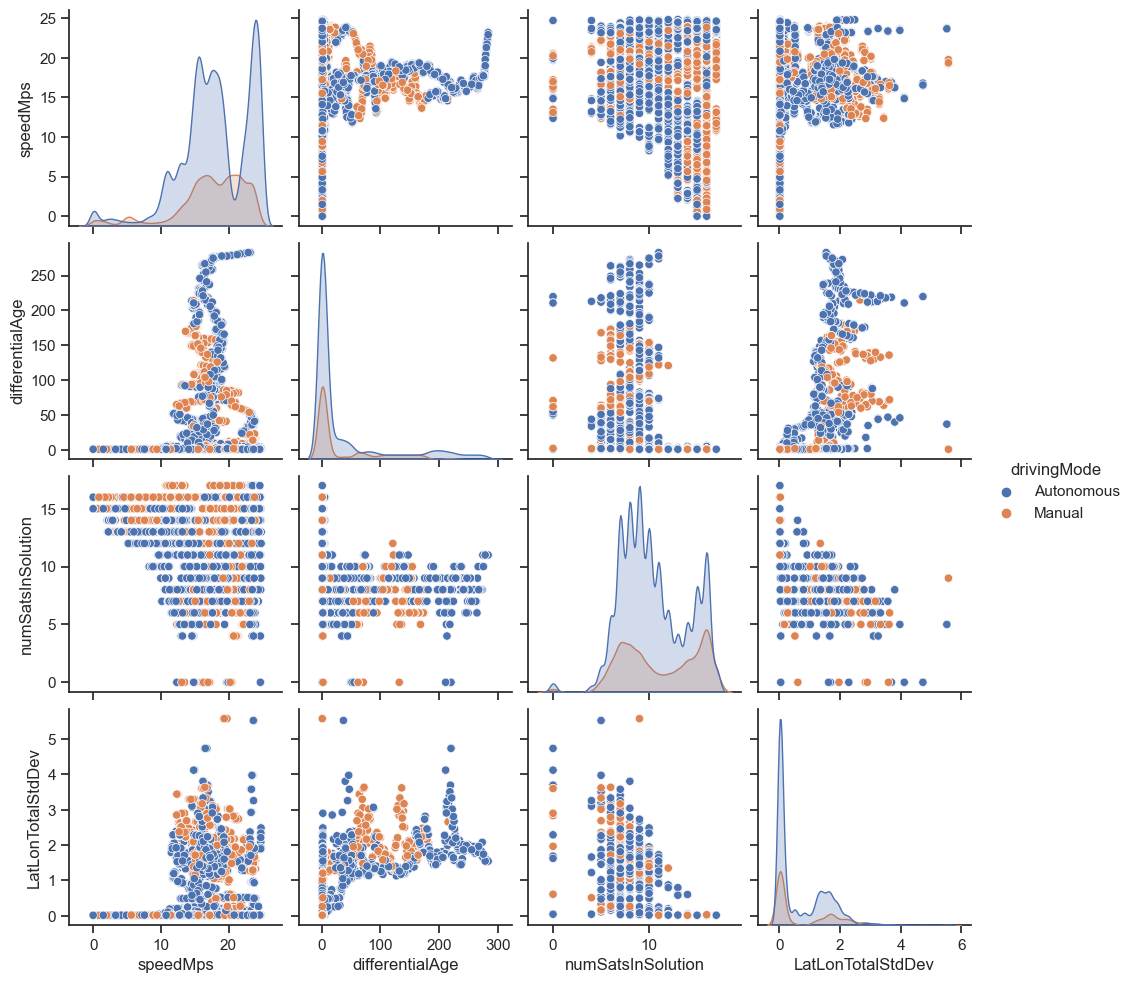

In [69]:
import seaborn as sns
sns.set_theme(style="ticks")

# df = sns.load_dataset("penguins")
sns.pairplot(merged_df.iloc[:i][cols].sample(i), hue="drivingMode")